## Ensemble Learning
- Ensemble methods are machine learning techniques that combine multiple models to produce a more accurate and robust predictor.
- Ensemble learning is a supervised learning technique used in machine learning to improve overall performance by combining the predictors from multiple models.

### ( 1 ) Comparing Single vs. Ensemble Classifiers
    - Write a program that demonstrates the advantage of ensemble learning compared to a single classifier.
    - Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
    - Compare their performance using evaluation metrics such as accuracy, precision, recall, and F1-score.
    - Explore the effect of changing the number of estimators (decision trees) in RandomForest. Write clear observations with justification.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import time
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons,  load_breast_cancer
import seaborn as sns
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/kaggle/input/heart-disease/heart .csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X = df.drop('target', axis=1)
y = df['target']

### Checking the null values

In [16]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

#### Train Test Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Function to evaluate the metrics of the model

In [18]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy        : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (avg) : {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (avg)    : {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score (avg)  : {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

#### Decision Tree

In [19]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
evaluate_model(dtree, "Decision Tree")


Decision Tree Performance:
Accuracy        : 0.7363
Precision (avg) : 0.7382
Recall (avg)    : 0.7402
F1 Score (avg)  : 0.7360
Confusion Matrix:
[[32  9]
 [15 35]]


#### Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest (100 Trees)")


Random Forest (100 Trees) Performance:
Accuracy        : 0.8132
Precision (avg) : 0.8118
Recall (avg)    : 0.8102
F1 Score (avg)  : 0.8109
Confusion Matrix:
[[32  9]
 [ 8 42]]


In [21]:
estimators_range = list(range(1,101,5))
print(list(estimators_range))
accuracies = []

for n in estimators_range:
    rf_n = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_n.fit(X_train, y_train)
    y_pred = rf_n.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


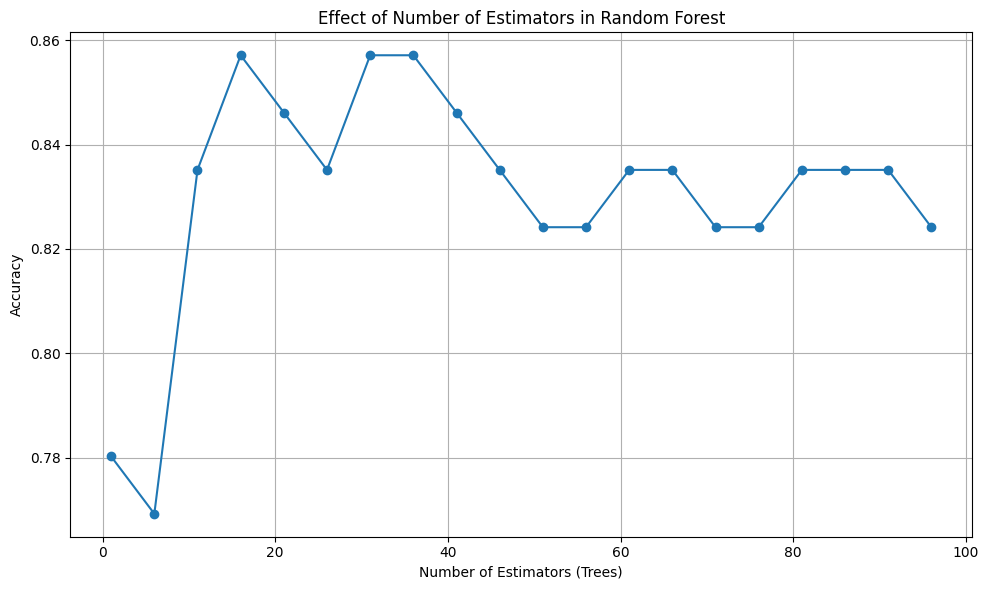

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies, marker='o')
plt.title("Effect of Number of Estimators in Random Forest")
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Implementing Simple Ensemble Techniques
#### Task:
#### Write a program that demonstrates the use of simple ensemble techniques: Max Voting, Average Voting, and Weighted Average Voting (assign weights based on each model’s
performance). Apply these techniques on a suitable dataset and compare results.

- Intermediate Questions:
    - How do the results vary between max voting, average voting, and weighted voting?
    - What is the role of weights in improving ensemble predictions?
    - Which base classifiers combine most effectively under each voting scheme?

In [37]:
model1 = LogisticRegression(max_iter=2000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()

In [38]:
models = [model1, model2, model3]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']

for model in models:
    model.fit(X_train, y_train)

In [39]:
preds = np.array([model.predict(X_test) for model in models])
max_voting_preds = []
for i in range(X_test.shape[0]):
    votes = preds[:, i]
    final_vote = np.bincount(votes).argmax()
    max_voting_preds.append(final_vote)


probs = np.array([model.predict_proba(X_test) for model in models])
avg_probs = np.mean(probs, axis=0)
avg_voting_preds = np.argmax(avg_probs, axis=1)

In [40]:
weights = []
for model in models:
    y_pred_train = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    weights.append(acc)

weights = np.array(weights) / np.sum(weights)  

weighted_probs = np.tensordot(weights, probs, axes=((0), (0)))
weighted_voting_preds = np.argmax(weighted_probs, axis=1)

In [41]:
print("Individual Model Accuracies:")
for name, model in zip(model_names, models):
    print(f"{name}: {accuracy_score(y_test, model.predict(X_test)):.3f}")

print("\n Ensemble Techniques:")
print(f"Max Voting Accuracy: {accuracy_score(y_test, max_voting_preds):.3f}")
print(f"Average Voting Accuracy: {accuracy_score(y_test, avg_voting_preds):.3f}")
print(f"Weighted Average Voting Accuracy: {accuracy_score(y_test, weighted_voting_preds):.3f}")

Individual Model Accuracies:
Logistic Regression: 0.813
Decision Tree: 0.736
KNN: 0.659

 Ensemble Techniques:
Max Voting Accuracy: 0.846
Average Voting Accuracy: 0.813
Weighted Average Voting Accuracy: 0.791


### 3. Hard Voting vs. Soft Voting Classifiers
#### Task:
#### Write a program to show the difference between Hard Voting and Soft Voting classifiers in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic Regression, and KNN).
- Intermediate Questions:
- What is the main difference in prediction mechanisms between hard and soft
voting?
 - In which situations does soft voting outperform hard voting?
 - How does the probability calibration of base classifiers influence soft voting?

In [42]:
hard_voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='hard'  # majority vote based on class labels
)

In [43]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='soft'  # based on average predicted probabilities
)

In [44]:
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [45]:
y_pred_hard = hard_voting_clf.predict(X_test)
y_pred_soft = soft_voting_clf.predict(X_test)

In [46]:
print("Individual Model Accuracies:")
for name, model in [('Logistic Regression', model1), ('Decision Tree', model2), ('KNN', model3)]:
    model.fit(X_train, y_train)
    print(f"{name}: {accuracy_score(y_test, model.predict(X_test)):.3f}")

print("\nEnsemble Accuracies:")
print(f"Hard Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_hard):.3f}")
print(f"Soft Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_soft):.3f}")

Individual Model Accuracies:
Logistic Regression: 0.813
Decision Tree: 0.736
KNN: 0.659

Ensemble Accuracies:
Hard Voting Classifier Accuracy: 0.846
Soft Voting Classifier Accuracy: 0.813


### 4. Exploring Bagging Technique (Random Forest)
#### Task:
#### Write a program to explore the Bagging technique using the RandomForestClassifier on a suitable dataset. Experiment with parameters such as number of estimators, maximum depth, and random state.
#### Write detailed observations and justify the changes in model performance.

Intermediate Questions:
- How do different values of n_estimators and max_depth affect model performance?
- What does Bagging achieve in terms of variance and bias reduction?
- How does Random Forest handle overfitting compared to a single Decision Tree?

In [47]:
n_estimators_list = [1, 5, 10, 50, 100, 200]
acc_list_estimators = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    acc_list_estimators.append(acc)


In [48]:
max_depth_list = [1, 2, 3, 5, 10, None]
acc_list_depth = []

for d in max_depth_list:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    acc_list_depth.append(acc)

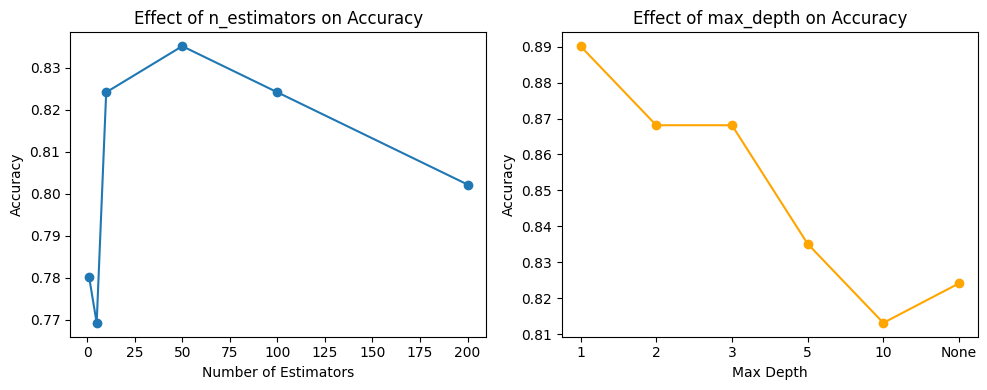

In [49]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(n_estimators_list, acc_list_estimators, marker='o')
plt.title("Effect of n_estimators on Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot([str(d) for d in max_depth_list], acc_list_depth, marker='o', color='orange')
plt.title("Effect of max_depth on Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [50]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_final.fit(X_train, y_train)
print(f"\n Final Random Forest Accuracy: {accuracy_score(y_test, rf_final.predict(X_test)):.3f}")


 Final Random Forest Accuracy: 0.824


### 5. Using RandomForestRegressor and OOB Score
#### Task:
#### Write a program using the RandomForestRegressor model to make predictions on a suitable regression dataset. Enable and observe the oob_score (Out-of-Bag score) parameter. Interpret the results and explain its significance.
Intermediate Questions:
- What does the oob_score_ indicate about model performance?
- How does Out-of-Bag evaluation differ from traditional test-set evaluation?
- How does the OOB score change with different numbers of trees?

In [54]:
n_estimators_list = [10, 50, 100, 200]
oob_scores = []
test_accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,       # Enable Out-of-Bag evaluation
        random_state=42,
        n_jobs=-1,
        bootstrap=True        # Needed for OOB
    )
    rf.fit(X_train, y_train)
    
    # Record OOB and test accuracy
    oob_scores.append(rf.oob_score_)
    y_pred = rf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

In [55]:
print("🔹 RandomForestClassifier: OOB and Test Accuracies\n")
for n, oob, test_acc in zip(n_estimators_list, oob_scores, test_accuracies):
    print(f"n_estimators={n:3d} | OOB Score: {oob:.3f} | Test Accuracy: {test_acc:.3f}")

🔹 RandomForestClassifier: OOB and Test Accuracies

n_estimators= 10 | OOB Score: 0.764 | Test Accuracy: 0.824
n_estimators= 50 | OOB Score: 0.821 | Test Accuracy: 0.835
n_estimators=100 | OOB Score: 0.816 | Test Accuracy: 0.824
n_estimators=200 | OOB Score: 0.807 | Test Accuracy: 0.802


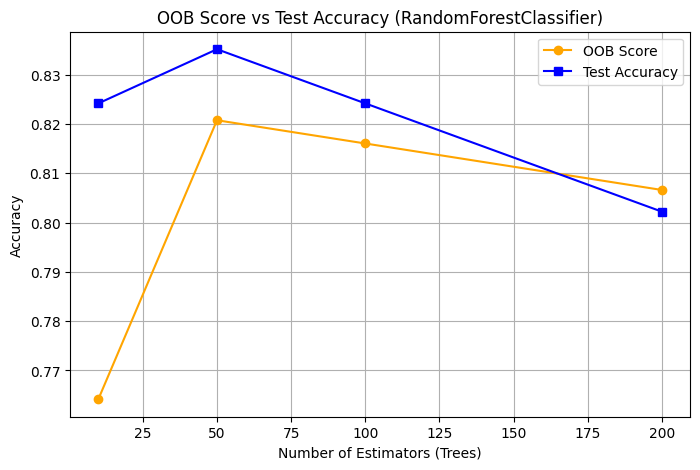

In [56]:
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, oob_scores, marker='o', label='OOB Score', color='orange')
plt.plot(n_estimators_list, test_accuracies, marker='s', label='Test Accuracy', color='blue')
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.title("OOB Score vs Test Accuracy (RandomForestClassifier)")
plt.legend()
plt.grid(True)
plt.show()

### 6. Exploring Boosting Techniques
#### Task:
#### Write a program to explore different Boosting techniques using suitable datasets:

- Adaptive Boosting (AdaBoost) – binary classification,
- Gradient Boosting – classification and regression,
- XGBoost,
- CatBoost.

### Write your observations for each model, highlighting how it improves over the previous iterations and corrects earlier errors.
Intermediate Questions:
 - How does AdaBoost focus on misclassified samples?
 - What makes Gradient Boosting more flexible than AdaBoost?
 - How do XGBoost and CatBoost optimize training speed and accuracy?
 - Which boosting algorithm provided the best trade-off between performance and computation time?

In [59]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.3f}")

AdaBoost Accuracy: 0.791


In [60]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")

Gradient Boosting Accuracy: 0.780


In [61]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")

XGBoost Accuracy: 0.813


In [62]:
cat_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat):.3f}")

CatBoost Accuracy: 0.769


#### 7. Comparative Study of Ensemble Models
#### Task:
#### Apply all ensemble models (Bagging, Random Forest, AdaBoost, Gradient Boosting,XGBoost, and CatBoost) on the same dataset. Prepare a detailed report comparing their results based on accuracy, training time, model interpretability, and overfitting/underfitting behavior. 
Intermediate Questions:
 - Which model achieved the best performance?
 - Why did that model perform better than others?
 - What trade-offs (speed, interpretability, complexity) did you observe across models?
 - Which ensemble method would you recommend for large-scale real-world data and why?

In [66]:
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss", random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        verbose=0, random_state=42, allow_writing_files=False
    ),
}

In [69]:
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_time = end_time - start_time

    results.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Training Time (s)": train_time,
        }
    )

In [70]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Accuracy", ascending=False))

               Model  Accuracy  Training Time (s)
1      Random Forest  0.824176           0.300572
4            XGBoost  0.813187           0.046588
2           AdaBoost  0.802198           0.084968
5           CatBoost  0.791209           0.980004
3  Gradient Boosting  0.780220           0.100677
0            Bagging  0.725275           0.032054


#### 8. Visualizing the Ensemble models
- Visualize decision boundaries of ensemble models.
- Compare ensemble performance under noisy or missing data.
- Analyze feature importance across different ensemble algorithms.

In [82]:
X_vis, y_vis = make_moons(n_samples=500, noise=0.3, random_state=42)

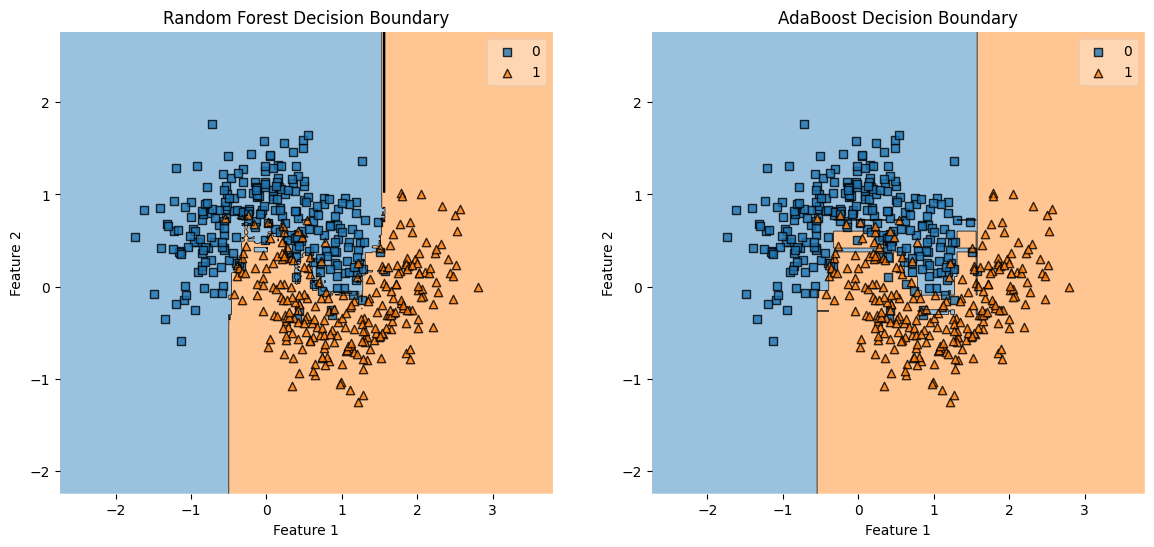

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest
rf_vis = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_vis.fit(X_vis, y_vis)
plot_decision_regions(X_vis, y_vis, clf=rf_vis, ax=ax1)
ax1.set_title("Random Forest Decision Boundary")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# AdaBoost
ada_vis = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_vis.fit(X_vis, y_vis)
plot_decision_regions(X_vis, y_vis, clf=ada_vis, ax=ax2)
ax2.set_title("AdaBoost Decision Boundary")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

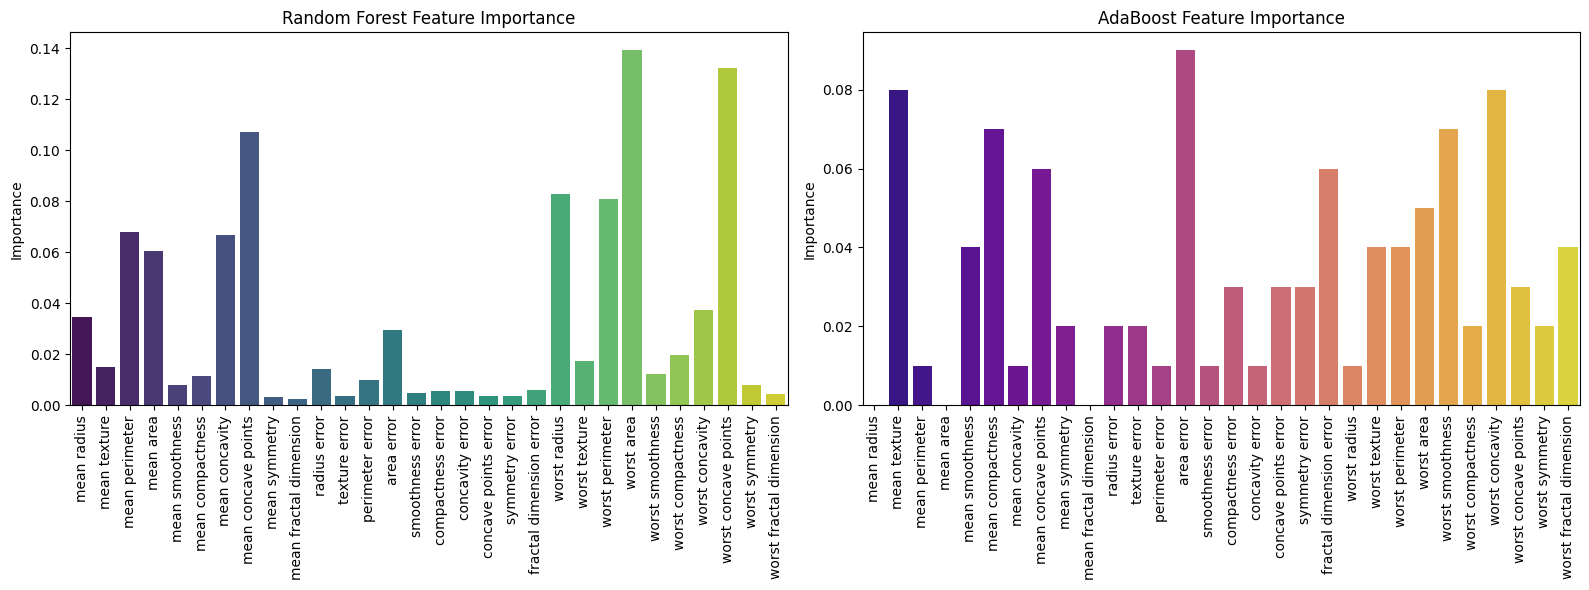

In [87]:
data = load_breast_cancer()
X, y = data.data, data.target

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert to DataFrame for plotting
X_df = pd.DataFrame(X_imputed, columns=data.feature_names)

# Train models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_df, y)
ada_model.fit(X_df, y)

# Feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_df.columns)
ada_importances = pd.Series(ada_model.feature_importances_, index=X_df.columns)

# Plot feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=rf_importances.index, y=rf_importances.values, ax=ax1, palette="viridis")
ax1.set_title("Random Forest Feature Importance")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("Importance")

sns.barplot(x=ada_importances.index, y=ada_importances.values, ax=ax2, palette="plasma")
ax2.set_title("AdaBoost Feature Importance")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_ylabel("Importance")

plt.tight_layout()
plt.show()

### 9. Exploring Heterogeneous Ensemble Models

#### Task:
#### Write a program to build a Heterogeneous Ensemble, combining different types of classifiers such as Decision Tree, K-Nearest Neighbors, Logistic Regression, and Support Vector Machine (SVM) using a VotingClassifier.

#### Compare the results with homogeneous ensembles.
#### Intermediate Questions:
- What makes an ensemble heterogeneous?
- How does model diversity influence the final performance?
- Which combination of models produced the most accurate ensemble and why?
- How does the voting method (hard vs. soft) impact the heterogeneous ensemble outcome?

In [88]:
# --- Homogeneous Ensemble (Random Forest) ---
homogeneous_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
homogeneous_model.fit(X_train, y_train)
homo_pred = homogeneous_model.predict(X_test)
homo_accuracy = accuracy_score(y_test, homo_pred)
print("Homogeneous Ensemble (Random Forest) Accuracy:", f"{homo_accuracy:.4f}")

Homogeneous Ensemble (Random Forest) Accuracy: 0.8242


In [99]:
# --- Heterogeneous Ensemble (VotingClassifier) ---
# Define the diverse base models
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter= 2000, random_state=42)
clf3 = KNeighborsClassifier()
# Use SVC with a smaller kernel to speed up training for the example
clf4 = SVC(kernel='linear', probability=True, random_state=42)

In [100]:
heterogeneous_model = VotingClassifier(
    estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3), ('svm', clf4)],
    voting='soft',
    n_jobs=-1
    
)


heterogeneous_model.fit(X_train, y_train)
hetero_pred = heterogeneous_model.predict(X_test)
hetero_accuracy = accuracy_score(y_test, hetero_pred)
print("Heterogeneous Ensemble (VotingClassifier) Accuracy:", f"{hetero_accuracy:.4f}")


Heterogeneous Ensemble (VotingClassifier) Accuracy: 0.8462
